2 lab </br>
Загрузка данныхи получение и превичный анализ признаков

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "telecom_churn.csv"
data = pd.read_csv(data_path)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

гистограмма

<AxesSubplot: >

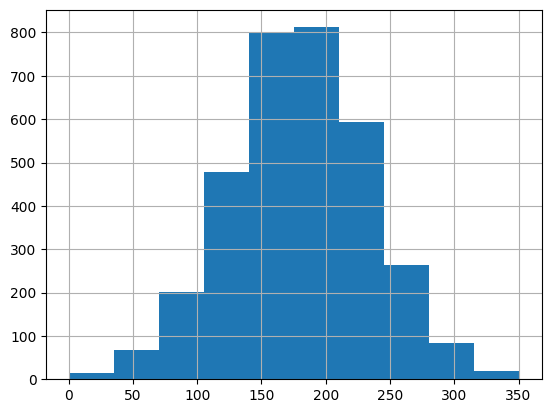

In [4]:
data['Total day minutes'].hist()

Построение гистограммы с использованием matplotlib

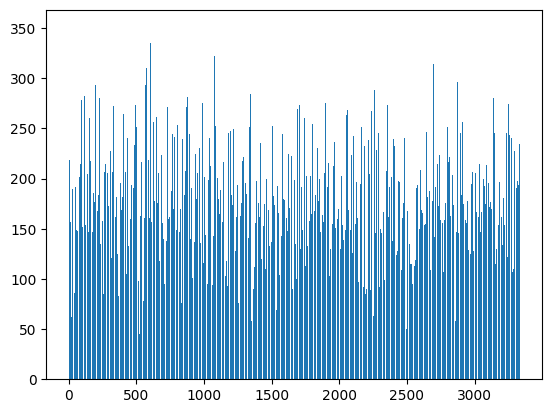

In [5]:
plt.bar(data.index, data['Total day minutes'])
plt.show()

Использование matplotlib для представления распределения значений признака

<BarContainer object of 1667 artists>

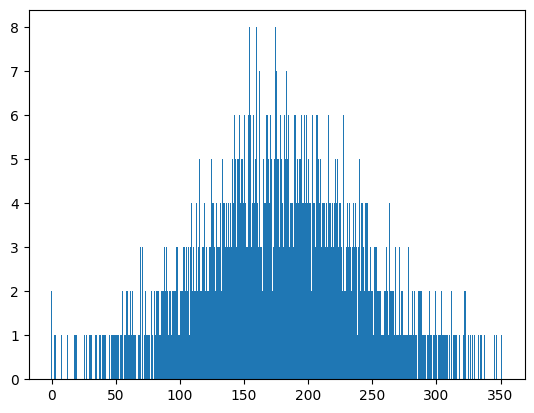

In [6]:
hist = data['Total day minutes'].value_counts()
plt.bar(hist.index, hist)

График «ящик с усами» для отдельного признака

<AxesSubplot: >

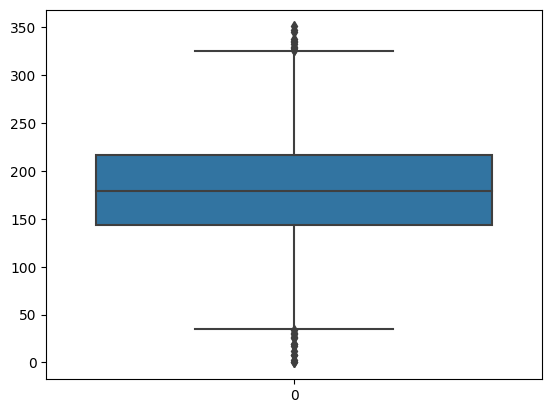

In [7]:
sns.boxplot(data['Total day minutes'])

Использование boxplot для анализа признака для пяти штатов

<AxesSubplot: xlabel='Total day minutes', ylabel='State'>

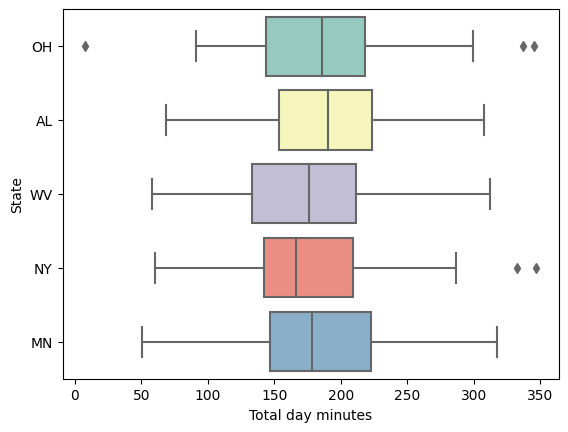

In [8]:
top_data = data[['State', 'Total day minutes']]
top_data = top_data.groupby('State').sum()
top_data = top_data.sort_values('Total day minutes', ascending = False)
top_data = top_data[:5].index.values
sns.boxplot(y='State', x='Total day minutes',
            data=data[data.State.isin(top_data)], palette = 'Set3')

Диаграммы для сравнения распределения числовых показателей

array([[<AxesSubplot: title={'center': 'Total day charge'}>,
        <AxesSubplot: title={'center': 'Total eve charge'}>],
       [<AxesSubplot: title={'center': 'Total night charge'}>,
        <AxesSubplot: title={'center': 'Total intl charge'}>]],
      dtype=object)

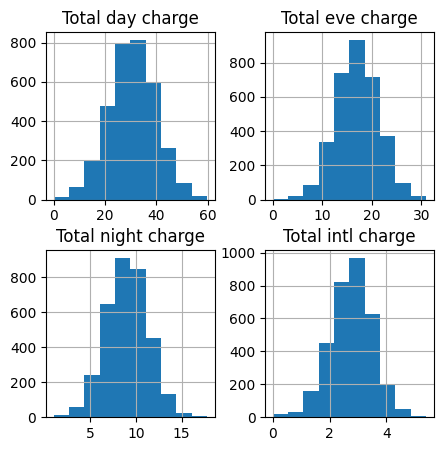

In [9]:
feats = [f for f in data.columns if 'charge' in f]
data[feats].hist(figsize=(5, 5))

Попарное распределение признаков

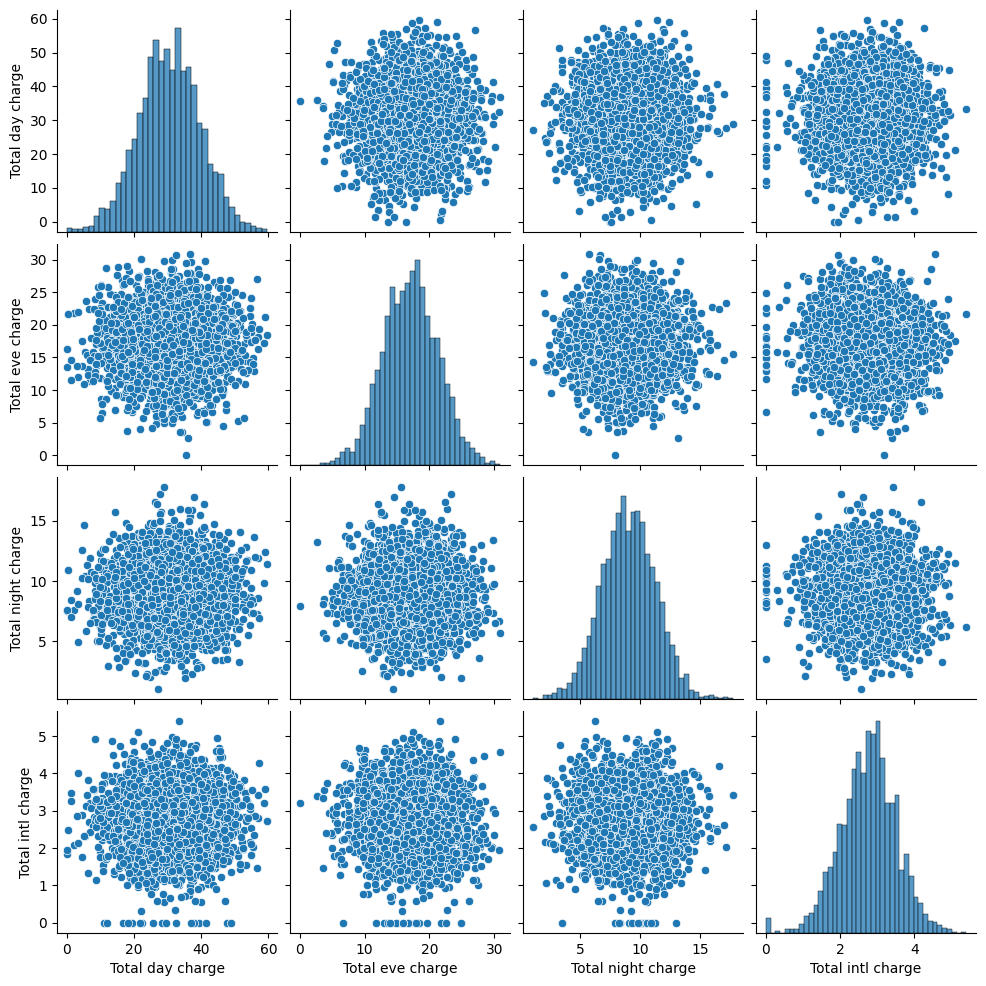

In [10]:
sns.pairplot(data[feats])

Попарное распределение признаков с визуализацией отказов

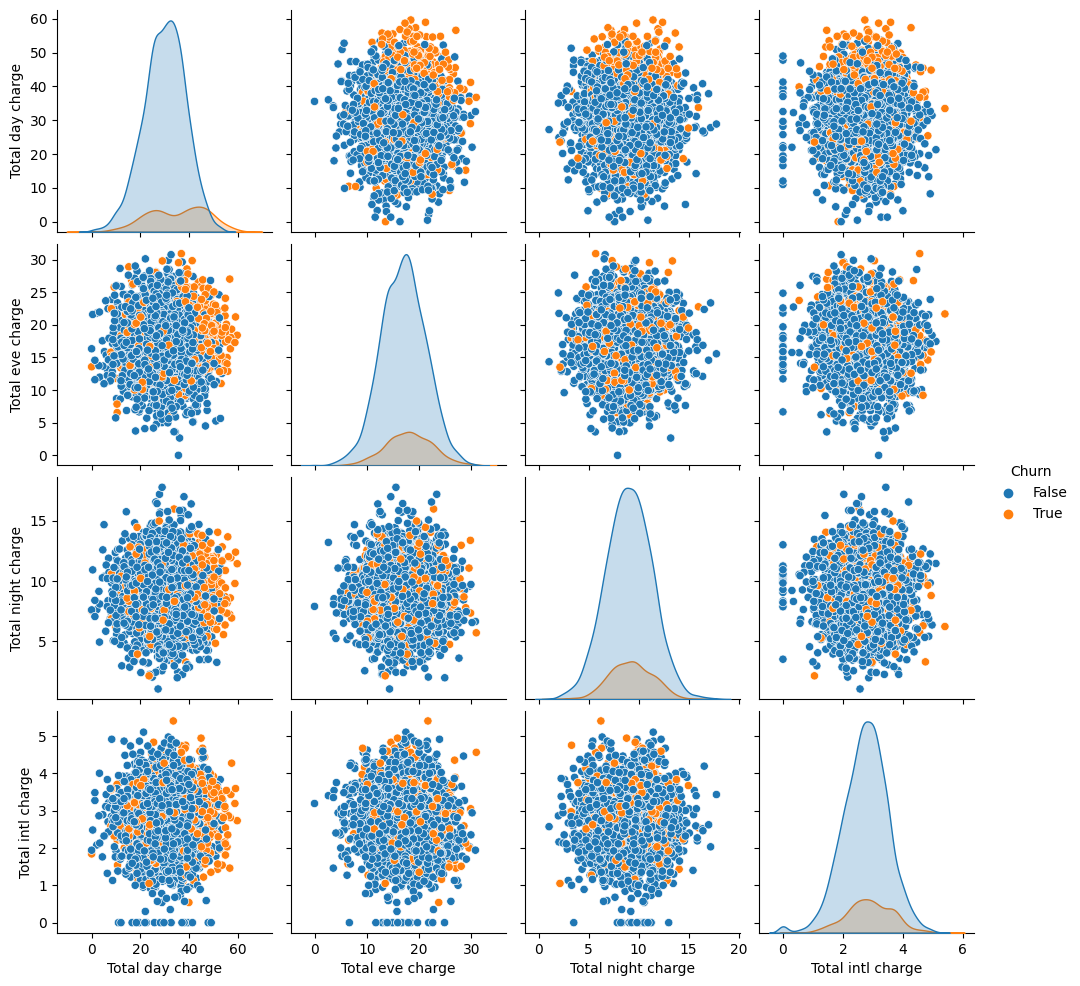

In [11]:
sns.pairplot(data[feats + ['Churn']], hue = 'Churn')

График scatter библиотеки matplotlib

Text(0.5, 1.0, 'Распределение по 2 признакам')

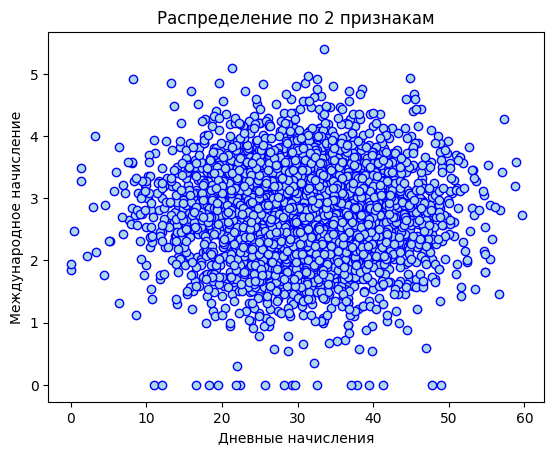

In [12]:
plt.scatter(data['Total day charge'], data['Total intl charge'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисления')
plt.ylabel('Международное начисление')
plt.title('Распределение по 2 признакам')

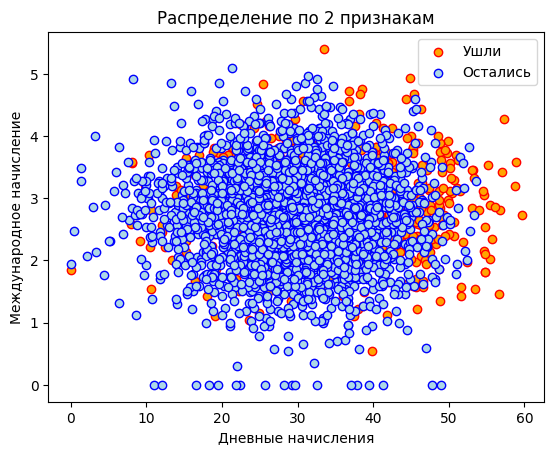

In [13]:
data_charn = data[data['Churn']]
data_loyal = data[~data['Churn']]

plt.scatter(data_charn['Total day charge'], data_charn['Total intl charge'],
            color='orange', edgecolors='red', label='Ушли')
plt.scatter(data_loyal['Total day charge'], data_loyal['Total intl charge'],
            color='lightblue', edgecolors='blue', label='Остались')
plt.xlabel('Дневные начисления')
plt.ylabel('Международное начисление')
plt.title('Распределение по 2 признакам')
plt.legend()

In [14]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_18176\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


C:\Users\user\AppData\Local\Temp\ipykernel_18176\4157012575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap=plt.cm.Blues)


<AxesSubplot: >

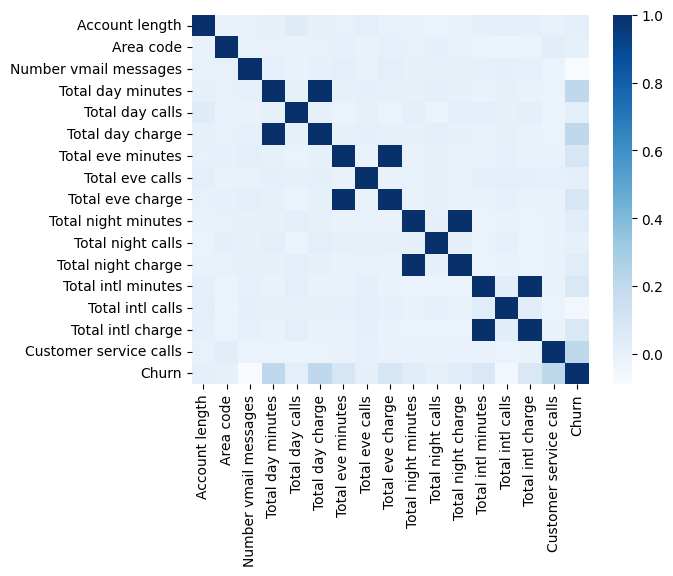

In [15]:
sns.heatmap(data.corr(), cmap=plt.cm.Blues)

Ответы на контрольные вопросы
##### 1. Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных
<ul>
    <li>corr()</li>
    <li>hist()</li>
    <li>info()</li>
    <li>median()</li>
</ul>

##### 2. Какая библиотека python предназначена для управления наборами данных: numpy, pandas, sklearn, opencv, matplotlib?
<ul>
    <li>scikit-learn</li>
    <li>SciPy</li>
</ul>

##### 3. Какая стратегия является нежелательной при обработке пропусков в данных?
<ul>
    <li>б) удаление строк, содержащих пропуски в данных;</li>
</ul>

##### 4. Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная y, которая представляет собой категориальный признак, опеределнный на домене {C#, Java, Python, R}. Нужно ли применять к данному целевому признаку OneHotEncoder?

Нет, не нужно применять OneHotEncoder к целевому атрибуту.

##### 5. Поясните принцип разбиения набора данных на обучающую и тестовую выборку. Какое соотношение «тестовая:обучающая» наиболее оптимально: 20:80, 50:50, 25:75, 5:95, 40:30?

20:80 - это соотношение подходит, когда набор данных очень большой, а проблема относительно проста. Оно позволяет использовать больший обучающий набор для выявления закономерностей в данных, оставляя при этом достаточно большой тестовый набор для оценки эффективности модели.

50:50 - это соотношение обычно используется, когда набор данных умеренного размера, а проблема не слишком сложна. Оно обеспечивает хороший баланс между размерами обучающего и тестового наборов, позволяя получить разумную оценку эффективности модели.

25:75 - это соотношение полезно, когда набор данных небольшой, а проблема относительно сложная. Оно позволяет использовать более крупное обучающее множество для выявления закономерностей в данных, оставляя при этом достаточно небольшое тестовое множество для оценки эффективности модели.

5:95 - это соотношение обычно используется в ситуациях, когда набор данных очень мал, а проблема очень сложна. Оно позволяет на небольшом обучающем множестве выявить закономерности в данных, оставляя при этом большое тестовое множество для оценки эффективности модели.

40:30 - это соотношение подходит, когда набор данных умеренного размера, а проблема относительно сложная. Оно обеспечивает немного большее количество обучающего набора, чтобы уловить больше закономерностей в данных, но при этом остается приемлемый тестовый набор для оценки работы модели.


##### 6. Поясните принцип разбиения набора данных на обучающую и тестовую выборку. Какое соотношение «тестовая:обучающая» наиболее оптимально: 20:80, 50:50, 25:75, 5:95, 40:30?
<ul>
    <li>а) dataset = read_csv(“data.csv”)</li>
</ul>

